# Restaurant Reviews Text Processing and Visualization

This document guides you through loading, cleaning, analyzing, and visualizing a dataset of restaurant reviews. Each section explains the purpose of the step, what is being done, and why it is important.


## 1. Importing Libraries

This section loads the necessary libraries for data handling, numerical operations, text processing, and plotting. Specifically, we import:

- **pandas**: For data manipulation using DataFrames.
- **numpy**: For numerical computations.
- **nltk**: For natural language processing tasks (e.g., tokenization, stop word removal, stemming, and lemmatization).
- **string**: For handling punctuation.
- **matplotlib**: For creating visualizations.
- **collections.Counter**: For counting occurrences (such as punctuation and stop words).
- **nltk.corpus.stopwords**: For retrieving a list of common English stop words.
- **nltk.tokenize**: For splitting text into words and sentences.
- **nltk.stem**: For stemming and lemmatization.
- **nltk.probability.FreqDist**: For computing frequency distributions.


In [1]:
import pandas as pd                   # For DataFrame operations
import numpy as np                    # For numerical operations
import nltk                           # For natural language processing tasks
import string                         # For handling punctuation
import matplotlib.pyplot as plt       # For plotting visualizations
from collections import Counter       # For counting elements (e.g., punctuation and stop words)
from nltk.corpus import stopwords     # For retrieving common stop words
from nltk.tokenize import word_tokenize, sent_tokenize  # For splitting text into words and sentences
from nltk.stem import PorterStemmer, WordNetLemmatizer  # For stemming and lemmatization
from nltk.probability import FreqDist  # For frequency distribution calculations

## 2. Downloading NLTK Datasets

Before processing the text, we need to download the necessary NLTK datasets:

- **punkt**: Provides models for tokenizing text into sentences and words.
- **stopwords**: Contains a list of common English stop words.
- **wordnet**: Supports lemmatization by providing dictionary forms of words.

This ensures that all required resources are available.


In [2]:
# Download required NLTK datasets (only needs to run once)
nltk.download('punkt')       # Tokenizer models
nltk.download('stopwords')   # English stop words
nltk.download('wordnet')     # WordNet for lemmatization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 3. Setting Up Text Processing Tools

We create objects to help with text processing:

- **PorterStemmer**: Reduces words to their root forms (e.g., "running" becomes "run").
- **WordNetLemmatizer**: Converts words into their base dictionary forms.
- **stop_words**: A set of common English stop words for quick lookup during filtering.


In [3]:
# Create text processing objects.
ps = PorterStemmer()                           # For stemming (e.g., "running" -> "run")
lemmatizer = WordNetLemmatizer()               # For converting words to their dictionary form
stop_words = set(stopwords.words("english"))   # Set of common stop words


## 4. Installing the Wordcloud Package

If you plan to generate word clouds and are working in a Jupyter notebook, you may need to install the `wordcloud` package. In other environments, install it via the command line.


In [4]:
# (Optional) Install wordcloud if you're running in a Jupyter environment
# Uncomment the following line if needed:
# !pip install wordcloud

## 5. Loading and Exploring the Restaurant Reviews Dataset

### Loading the Data

- **File Path & Column Specification:**  
  The CSV file containing restaurant reviews is defined (e.g., `"Restaurant_Reviews.csv"`) and loaded into a pandas DataFrame using `pd.read_csv()`. Additionally, the target (e.g., `'Rating'`) and text (e.g., `'Review'`) columns are specified.

- **Confirmation:**  
  After loading the data, a confirmation message is printed along with the dataset's shape (number of rows and columns) to verify that the data was loaded successfully.

### Inspecting Data Structure

- **Previewing Data:**  
  The first few rows of the dataset are displayed using the `head()` method to provide an initial look at the content and structure.

- **Dataset Information:**  
  The `info()` method is used to display column names, data types, and non-null counts, offering insight into the dataset’s completeness.

- **Missing Values & Duplicates:**  
  - Missing values are identified with `df.isnull().sum()` to check for any gaps in the data.  
  - Duplicate rows are counted using `df.duplicated().sum()` to detect potential redundancy.

### Counting Unique Values

- The `nunique()` method is applied to each column to assess the number of unique values, helping to understand the variability within categorical and numerical data.

### Visualizing Class Distribution

- A bar chart is generated for the target variable (e.g., `'Rating'`) using the column’s `value_counts()` to display how classes are distributed. This visualization helps quickly assess whether the dataset might be imbalanced for classification tasks.

### Visualizing Text Length Distribution

- A histogram is plotted to show the distribution of review lengths by examining the number of characters in each review (`df['Review'].str.len()`). This provides insight into the variability in the length of reviews across the dataset.


Data loaded successfully!
Dataset shape: (10000, 7)

First Few Rows of the Dataset:
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11     

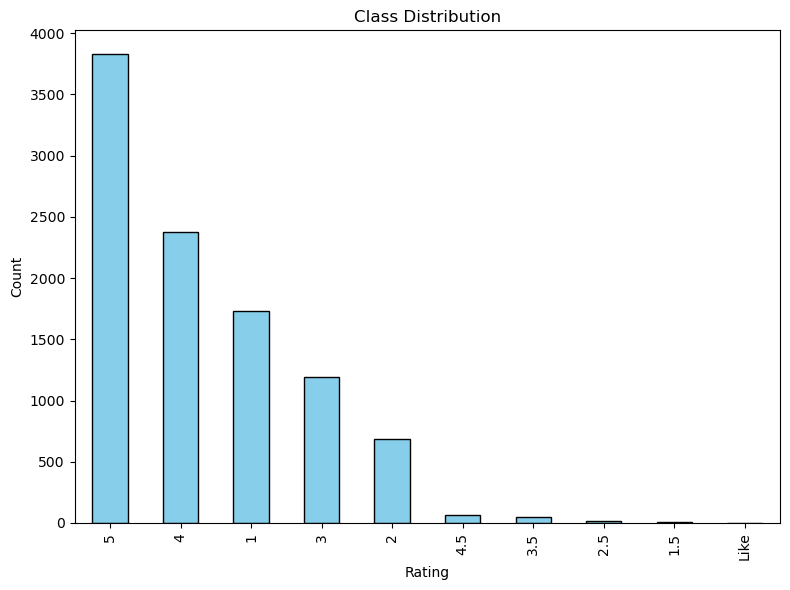

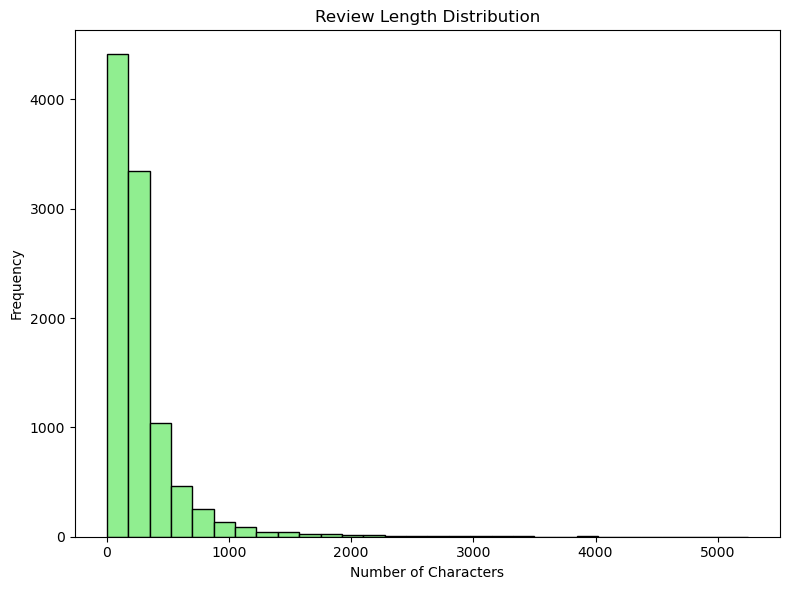

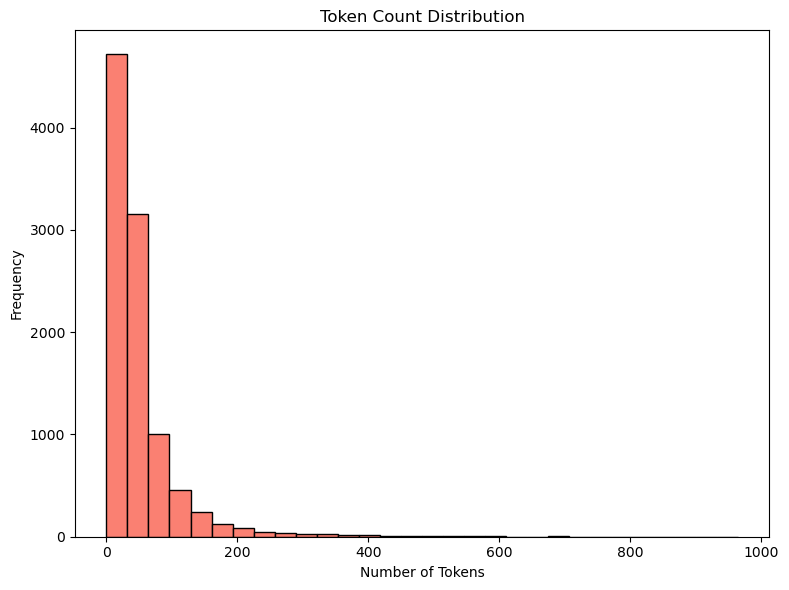

In [13]:
# Define the path to the CSV file (update the path if needed).
file_path = "Restaurant_Reviews.csv"

# Specify the target column (e.g., sentiment label) and text column (e.g., review text).
target_column = 'Rating'   # Update this if your target column name is different.
text_column = 'Review'    # Update this if your text column name is different.

# Load the dataset into a pandas DataFrame.
df = pd.read_csv(file_path)
print("Data loaded successfully!")
print("Dataset shape:", df.shape)

# Preview the first few rows.
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Display DataFrame information.
print("\nDataset Information:")
print(df.info())

# Check for missing values.
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Check for duplicate rows.
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Show unique value counts for each column.
print("\nUnique Value Count Per Column:")
print(df.nunique())

# --- Visualizing Class Distribution ---
if target_column in df.columns:
    plt.figure(figsize=(8, 6))
    df[target_column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Class Distribution")
    plt.xlabel(target_column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# --- Visualizing Text Length Distribution ---
if text_column in df.columns:
    plt.figure(figsize=(8, 6))
    df[text_column].str.len().plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
    plt.title("Review Length Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## 6. Standardizing Review Texts

To ensure consistency and avoid mismatches due to letter case, we convert all review texts to lowercase. A new column (lowercased) is created, and we print both the original and lowercased reviews for the first five rows.



In [6]:
# Convert all review texts to lowercase for consistency.
df['lowercased'] = df['Review'].astype(str).str.lower()

# Compare the original and lowercased reviews for the first 5 rows.
print("\nOriginal and Lowercased Reviews (Top 5 Rows):")
for i in range(5):
    print(f"Row {i+1}:")
    print("Original Review: ", df.iloc[i]['Review'])
    print("Lowercased:     ", df.iloc[i]['lowercased'])
    print("-" * 50)



Original and Lowercased Reviews (Top 5 Rows):
Row 1:
Original Review:  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.
Lowercased:      the ambience was good, food was quite good . had saturday lunch , which was cost effective .
good place for a sate brunch. one can also chill with friends and or parents.
waiter soumen das was really courteous and helpful.
--------------------------------------------------
Row 2:
Original Review:  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service
Lowercased:      ambience is too good for a pleasant evening. service is very prompt. food is good. over all a good experience. soumen das - kudos to the service
--------------------------------------------------
Row 3:
Original Review:  A must

## 7. Tokenizing the Lowercased Text

This section breaks the lowercased reviews into sentences and words:

### Sentence Tokenization
- Uses `sent_tokenize` to split reviews into sentences.

### Word Tokenization
- Uses `word_tokenize` to split reviews into individual words.

### Verification
- Prints the tokenized sentences and words for the first five reviews.


In [7]:
# Split lowercased reviews into sentences and words.
df['tokenized_sentences'] = df['lowercased'].apply(sent_tokenize)
df['tokenized_words'] = df['lowercased'].apply(word_tokenize)

# Display tokenized results for the first 5 rows.
print("\nTokenized Sentences and Words (Top 5 Rows):")
for i in range(5):
    print(f"Row {i+1}:")
    print("Tokenized Sentences: ", df.iloc[i]['tokenized_sentences'])
    print("Tokenized Words:     ", df.iloc[i]['tokenized_words'])
    print("-" * 50)



Tokenized Sentences and Words (Top 5 Rows):
Row 1:
Tokenized Sentences:  ['the ambience was good, food was quite good .', 'had saturday lunch , which was cost effective .', 'good place for a sate brunch.', 'one can also chill with friends and or parents.', 'waiter soumen das was really courteous and helpful.']
Tokenized Words:      ['the', 'ambience', 'was', 'good', ',', 'food', 'was', 'quite', 'good', '.', 'had', 'saturday', 'lunch', ',', 'which', 'was', 'cost', 'effective', '.', 'good', 'place', 'for', 'a', 'sate', 'brunch', '.', 'one', 'can', 'also', 'chill', 'with', 'friends', 'and', 'or', 'parents', '.', 'waiter', 'soumen', 'das', 'was', 'really', 'courteous', 'and', 'helpful', '.']
--------------------------------------------------
Row 2:
Tokenized Sentences:  ['ambience is too good for a pleasant evening.', 'service is very prompt.', 'food is good.', 'over all a good experience.', 'soumen das - kudos to the service']
Tokenized Words:      ['ambience', 'is', 'too', 'good', 'for'

## 8. Aggregating and Summarizing Removed Punctuation

In this step, we remove punctuation from the tokenized words and summarize which punctuation marks were removed.

### Removing Punctuation

- Define a function that separates punctuation from words.
- The function returns two lists: one without punctuation and one with only the removed punctuation.

### Applying the Function

- Apply the function to the tokenized words to create two new columns: `words_no_punct` and `removed_punct`.

### Summarizing Removal

- Flatten the lists of removed punctuation.
- Use `Counter` to count the occurrences.
- Extract and print the top 20 most frequently removed punctuation marks.


In [8]:
# Define a function to remove punctuation from a list of tokens.
# Returns two lists: one with punctuation removed and one with the removed punctuation.
def remove_punctuation(tokens):
    words_no_punct = []
    removed_punct = []
    for token in tokens:
        # If the token is a punctuation mark, track it.
        if token in string.punctuation:
            removed_punct.append(token)
        else:
            words_no_punct.append(token)
    return words_no_punct, removed_punct

# Apply the punctuation removal function to the tokenized words.
# This creates two new columns: 'words_no_punct' (tokens without punctuation) and 'removed_punct' (the punctuation marks).
df[['words_no_punct', 'removed_punct']] = df['tokenized_words'].apply(
    lambda tokens: pd.Series(remove_punctuation(tokens))
)

# Aggregate and summarize removed punctuation.
all_removed_punct = [punct for sublist in df['removed_punct'] for punct in sublist]
punct_count_summary = dict(Counter(all_removed_punct))
top_20_punct = sorted(punct_count_summary.items(), key=lambda x: x[1], reverse=True)[:20]

print("\nDataset-wide Punctuation Removal Summary:")
print(f"Total Reviews Processed: {len(df)}")
print(f"Total Punctuation Removed: {len(all_removed_punct)}")
print("\nTop 20 Most Commonly Removed Punctuation:")
for punct, count in top_20_punct:
    print(f"'{punct}': {count} times")



Dataset-wide Punctuation Removal Summary:
Total Reviews Processed: 10000
Total Punctuation Removed: 55954

Top 20 Most Commonly Removed Punctuation:
'.': 31905 times
',': 13101 times
'!': 3721 times
':': 1763 times
')': 1312 times
'-': 1223 times
'(': 1112 times
'&': 472 times
'#': 309 times
'?': 270 times
'*': 267 times
';': 98 times
''': 86 times
'@': 82 times
'%': 74 times
'+': 39 times
'/': 34 times
'>': 20 times
'[': 16 times
']': 15 times


## 9. Removing Stop Words and Summarizing Their Removal

This section removes common stop words (like "the", "is", "and") to focus on meaningful words.

### Stop Word Removal

- Apply a lambda function to filter out any token found in the `stop_words` set from the `words_no_punct` column.
- Save the result in a new column called `words_no_stop`.

### Comparing Before and After

- For the first five reviews, reconstruct sentences from tokens before and after stop word removal to visualize the impact.

### Summarizing Removed Stop Words

- Aggregate the removed stop words from the token lists.
- Use `Counter` to count their occurrences.
- Print the top 20 most frequently removed stop words.


In [9]:
# Remove stop words from the tokens (after punctuation removal).
df['words_no_stop'] = df['words_no_punct'].apply(
    lambda words: [word for word in words if word.lower() not in stop_words]
)

# Compare the sentences before and after stop word removal for the first 5 rows.
print("\nOriginal vs. Cleaned Sentences (Top 5 Rows):")
for i in range(5):
    # Reconstruct the sentence from tokens without punctuation.
    original_sentence = " ".join(df.iloc[i]['words_no_punct'])
    # Reconstruct the sentence from tokens with stop words removed.
    cleaned_sentence = " ".join(df.iloc[i]['words_no_stop'])
    print(f"Row {i+1}:")
    print("Original Sentence (No Punctuation): ", original_sentence)
    print("Cleaned Sentence (Stop Words Removed):  ", cleaned_sentence)
    print("-" * 50)

# Aggregate and summarize the removed stop words.
all_removed_stop_words = [
    word.lower() for sublist in df['words_no_punct'] for word in sublist if word.lower() in stop_words
]
stop_word_count_summary = dict(Counter(all_removed_stop_words))
top_20_stop_words = sorted(stop_word_count_summary.items(), key=lambda x: x[1], reverse=True)[:20]

print("\nTop 20 Most Commonly Removed Stop Words:")
for word, count in top_20_stop_words:
    print(f"'{word}': {count} times")



Original vs. Cleaned Sentences (Top 5 Rows):
Row 1:
Original Sentence (No Punctuation):  the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful
Cleaned Sentence (Stop Words Removed):   ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful
--------------------------------------------------
Row 2:
Original Sentence (No Punctuation):  ambience is too good for a pleasant evening service is very prompt food is good over all a good experience soumen das kudos to the service
Cleaned Sentence (Stop Words Removed):   ambience good pleasant evening service prompt food good good experience soumen das kudos service
--------------------------------------------------
Row 3:
Original Sentence (No Punctuation):  a must try .. great food great a

## 10. Word Cloud Visualization

This section creates a word cloud to visualize the most frequent words in the cleaned reviews.

### Importing WordCloud

- Import the `WordCloud` class to generate the visualization.

### Combining Cleaned Words

- Concatenate all tokens from the `words_no_stop` column into a single string.

### Generating the Word Cloud

- Create a word cloud image with specified dimensions and a white background.

### Displaying the Word Cloud

- Use `matplotlib` to display the image with a title, hiding the axis labels for clarity.

### Error Handling

- Catch an `ImportError` if the `wordcloud` module is not installed, with instructions on how to install it.


In [10]:
try:
    from wordcloud import WordCloud  # Import the WordCloud class

    # Combine all cleaned tokens (with stop words removed) into one string.
    all_words = ' '.join([' '.join(words) for words in df['words_no_stop']])
    
    # Generate the word cloud image.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    # Display the word cloud.
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis labels
    plt.title("Word Cloud of Reviews")
    plt.show()
    
except ImportError:
    print("WordCloud module is not installed. Please install it using 'pip install wordcloud'.")


WordCloud module is not installed. Please install it using 'pip install wordcloud'.


## 11. Frequency Distribution Plot

Finally, we create a frequency distribution plot to display the top 20 most frequent words from the cleaned reviews.

### Combining All Words

- Build a list of all words from the `words_no_stop` column.

### Calculating Frequency Distribution

- Use NLTK’s `FreqDist` to compute how often each word appears.

### Plotting

- Plot a bar chart of the top 20 most frequent words using `matplotlib`.


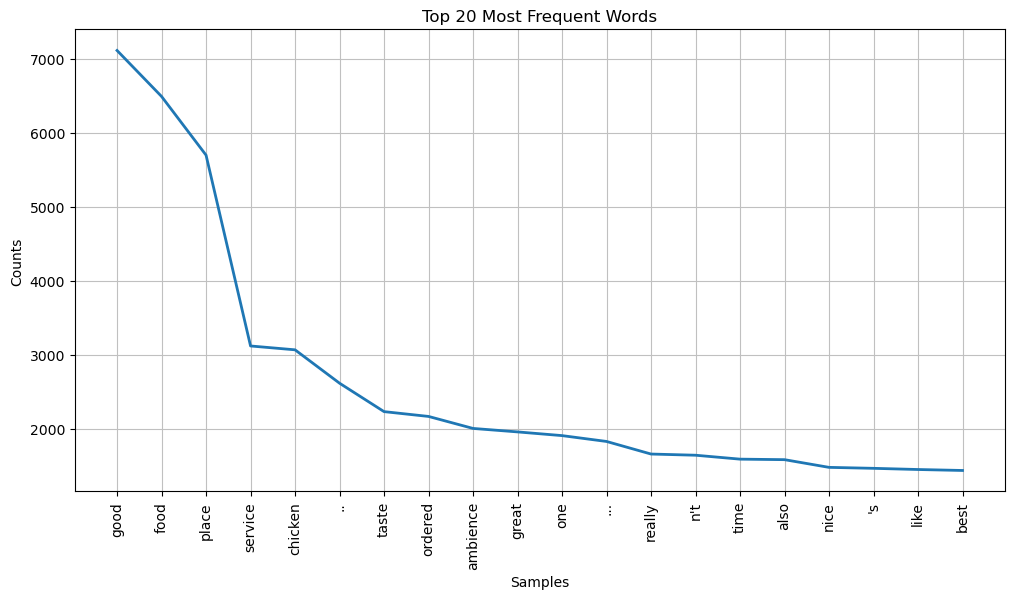

In [11]:
# Create a list containing every cleaned word from all reviews.
all_words_list = [word for words in df['words_no_stop'] for word in words]

# Calculate the frequency distribution of words.
freq_dist = FreqDist(all_words_list)

# Plot the top 20 most frequent words.
plt.figure(figsize=(12, 6))
freq_dist.plot(20, title="Top 20 Most Frequent Words")
plt.show()
